In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pc= pd.read_csv("Computer_Data.csv")

In [3]:
pc.shape

(6259, 11)

In [4]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [5]:
pc.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [6]:
pc.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [7]:
pc.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
import seaborn as sns

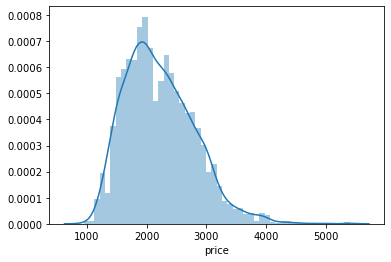

In [9]:
sns.distplot(pc['price'])

In [79]:
pc.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [130]:
pc.tail()

,price,speed,ram,screen,cd,multi,premium,ads,trend
6254,1690,100,8,15,no,no,yes,39,35
6255,2223,66,16,15,yes,yes,yes,39,35
6256,2654,100,24,15,yes,no,yes,39,35
6257,2195,100,16,15,yes,no,yes,39,35
6258,2490,100,16,17,yes,no,yes,39,35


In [5]:
cd_d=pd.get_dummies(pc['cd'],drop_first=True)

In [81]:
cd_d

,yes
0,0
1,0
2,0
3,0
4,0
...,...
6254,0
6255,1
6256,1
6257,1


In [6]:
cd_d.rename(columns={'yes':'cd_dum'},inplace=True)

In [83]:
cd_d

,cd_dum
0,0
1,0
2,0
3,0
4,0
...,...
6254,0
6255,1
6256,1
6257,1


In [7]:
multi_d=pd.get_dummies(pc['multi'],drop_first=True)

In [8]:
multi_d.rename(columns={'yes':'multi_dum'},inplace=True)

In [9]:
premium_d=pd.get_dummies(pc['premium'],drop_first=True)

In [10]:
premium_d.rename(columns={'yes':'premium_dum'},inplace=True)

In [11]:
pc.drop(['cd','multi','premium'],axis=1,inplace=True)

In [89]:
pc

,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1
2,1595,25,170,4,15,94,1
3,1849,25,170,8,14,94,1
4,3295,33,340,16,14,94,1
...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35
6255,2223,66,850,16,15,39,35
6256,2654,100,1200,24,15,39,35
6257,2195,100,850,16,15,39,35


In [12]:
pc=pd.concat([pc,cd_d,multi_d,premium_d],axis=1)

In [13]:
pc

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


(array([2360., 1830., 1187.,  393.,  388.,   72.,   10.,   16.,    0.,
           3.]),
 array([  80.,  282.,  484.,  686.,  888., 1090., 1292., 1494., 1696.,
        1898., 2100.]),
 <a list of 10 Patch objects>)

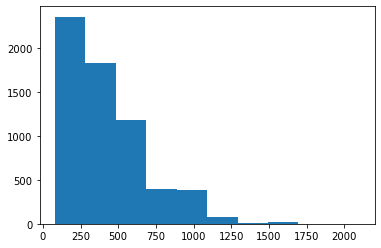

In [173]:
plt.hist(pc.hd)

In [50]:
X=pc.drop('price',axis=1)
y=pc['price']

In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(train_X, train_y)

In [53]:
reg.score(test_X,test_y)

0.7642419326459579

In [54]:
reg.score(train_X,train_y)

0.7796901590365022

In [163]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.1, max_iter=1000, tol=0.1)

In [164]:
lasso_reg.fit(train_X,train_y)

Lasso(alpha=0.1, tol=0.1)

In [165]:
lasso_reg.score(test_X,test_y)

0.7643072354340128

In [166]:
lasso_reg.score(train_X,train_y)

0.7796893248240042

In [167]:
from sklearn.linear_model import Ridge

In [168]:
ridge_reg=Ridge(alpha=0.1, max_iter=1000, tol=0.1)

In [169]:
ridge_reg.fit(train_X,train_y)

Ridge(alpha=0.1, max_iter=1000, tol=0.1)

In [170]:
ridge_reg.score(test_X,test_y)

0.7642485876849492

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [56]:
featureScores

,Specs,Score
0,speed,18316.204859
1,hd,516694.770621
2,ram,16832.875560
3,screen,188.731190
4,ads,44941.378570
5,trend,9153.130339
6,cd_dum,1424.995543
7,multi_dum,2328.700122
8,premium_dum,371.476494


In [57]:
print(featureScores.nlargest(9,'Score'))

         Specs          Score
1           hd  516694.770621
4          ads   44941.378570
0        speed   18316.204859
2          ram   16832.875560
5        trend    9153.130339
7    multi_dum    2328.700122
6       cd_dum    1424.995543
8  premium_dum     371.476494
3       screen     188.731190


In [14]:
pc2=pc

In [93]:
pc2

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


In [94]:
pc2.drop(['screen','premium_dum'],axis=1,inplace=True)

In [101]:
X=pc2.drop('price',axis=1)
y=pc2['price']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(train_X, train_y)

In [98]:
reg.score(test_X,test_y)

0.7642419326459579

In [99]:
reg.score(train_X,train_y)

0.7796901590365022

In [ ]:
#Even after dropping the columns the accuracy score remains unchanged.

In [100]:
pc2

,price,speed,hd,ram,ads,trend,cd_dum,multi_dum
0,1499,25,80,4,94,1,0,0
1,1795,33,85,2,94,1,0,0
2,1595,25,170,4,94,1,0,0
3,1849,25,170,8,94,1,0,0
4,3295,33,340,16,94,1,0,0
...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,39,35,0,0
6255,2223,66,850,16,39,35,1,1
6256,2654,100,1200,24,39,35,1,0
6257,2195,100,850,16,39,35,1,0


In [ ]:
##Information Gain 

In [102]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram          1.750355
hd           1.331245
cd_dum       0.982104
speed        0.798173
trend        0.423257
multi_dum    0.381858
ads          0.203910
dtype: float64

In [103]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.17586539, 0.31350916, 0.4981747 , 0.08815314, 0.20995294,
       0.18217255, 0.11872962])

In [104]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ram          0.498175
hd           0.313509
trend        0.209953
cd_dum       0.182173
speed        0.175865
multi_dum    0.118730
ads          0.088153
dtype: float64

In [17]:
import seaborn as sns

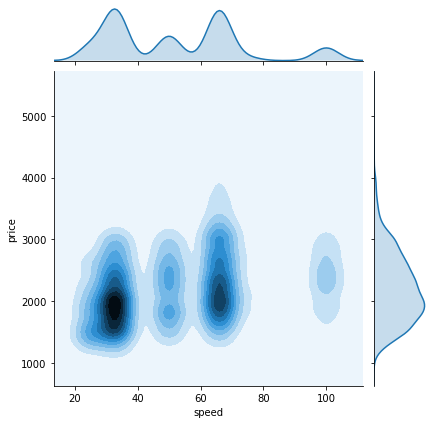

In [110]:
sns.jointplot(x='speed',y='price',data=pc2,kind='kde')

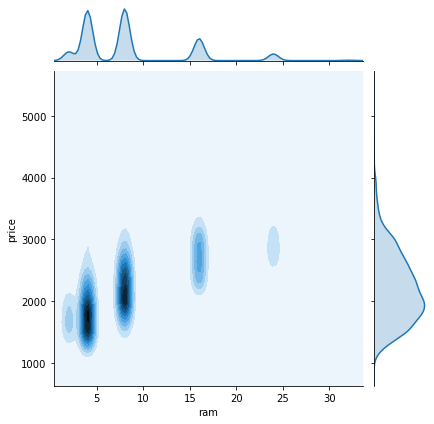

In [111]:
sns.jointplot(x='ram',y='price',data=pc2,kind='kde')

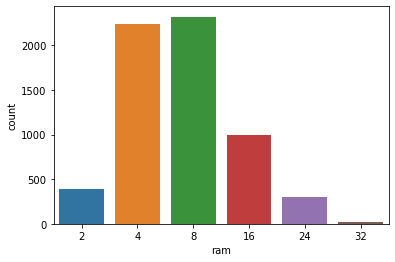

In [114]:
sns.countplot(pc2['ram'])

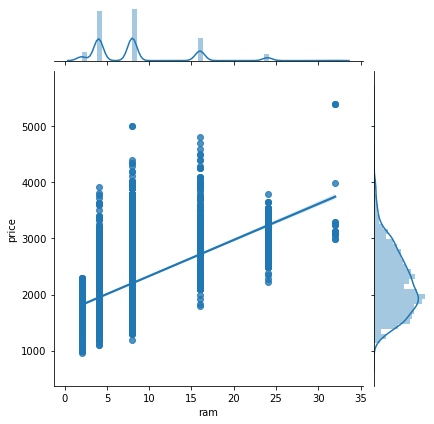

In [18]:
sns.jointplot(x='ram',y='price',data=pc2,kind='reg')

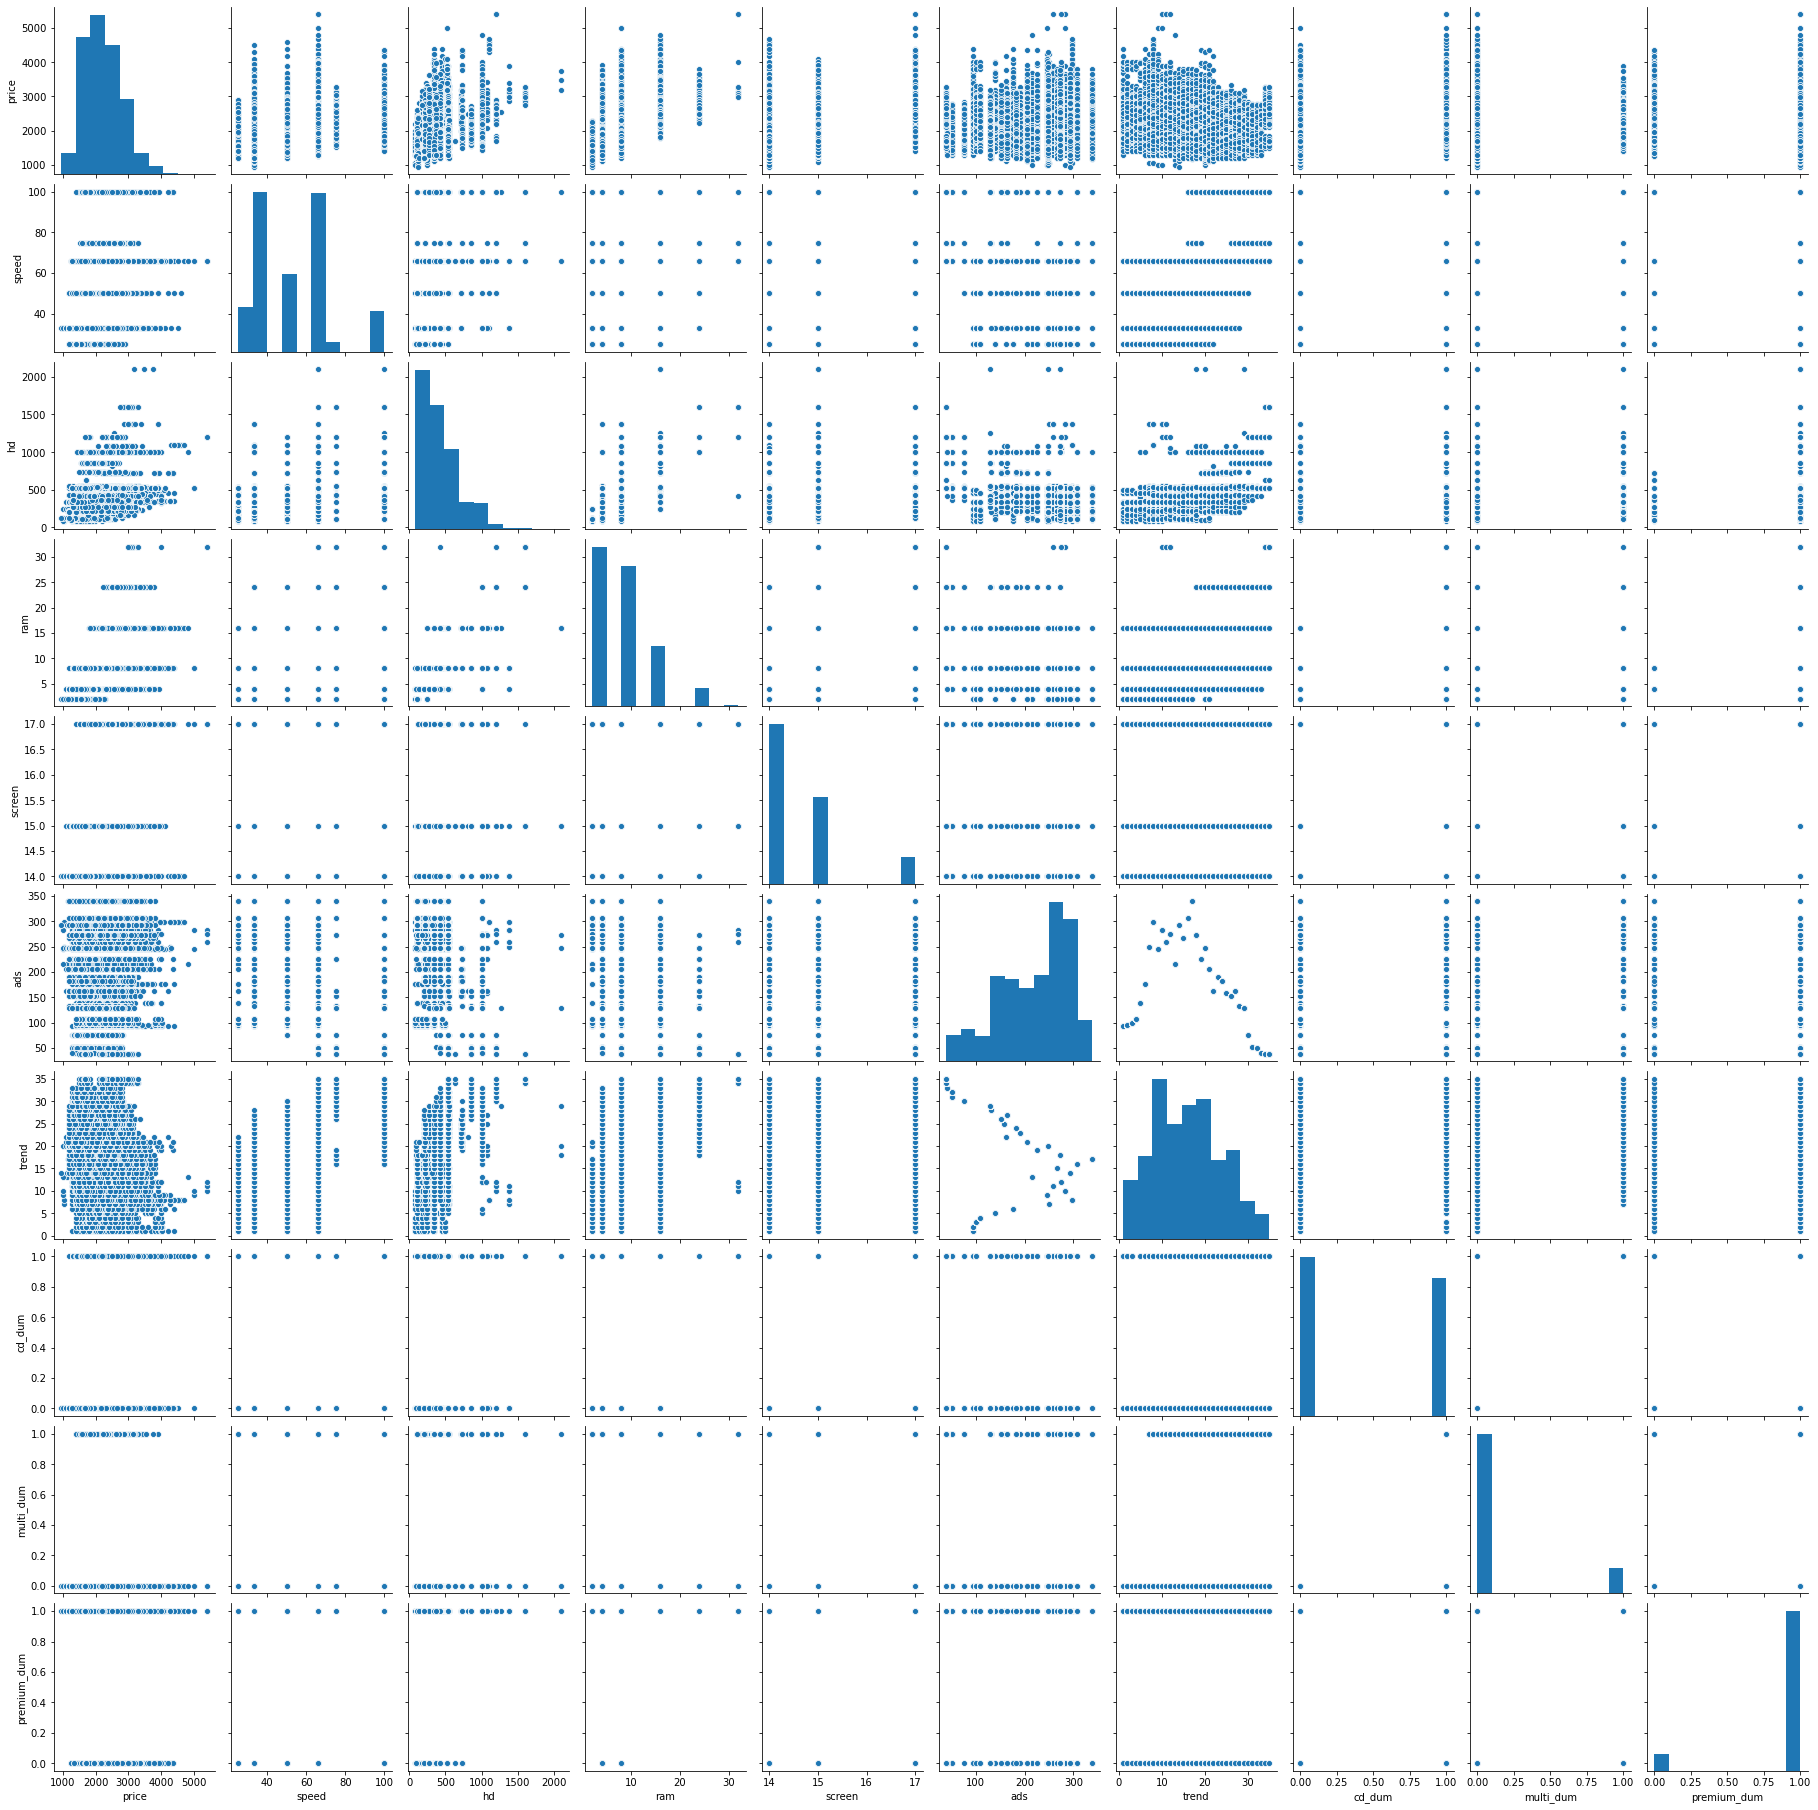

In [19]:
sns.pairplot(pc2)

In [20]:
pc2.describe()

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,0.464611,0.139479,0.902221
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,0.498786,0.346474,0.297040
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,0.000000,0.000000,1.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,1.000000,0.000000,1.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000


In [36]:
pc2['price_per_ram']=pc2['price']/pc2['ram']

In [45]:
pc2.describe()

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum,price_per_ram
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,0.464611,0.139479,0.902221,361.145898
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,0.498786,0.346474,0.297040,190.945082
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000,92.625000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,0.000000,0.000000,1.000000,224.875000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000,319.375000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,1.000000,0.000000,1.000000,449.750000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000,1147.000000


In [49]:
min_thresold, max_thresold = pc2.price_per_ram.quantile([0.005, 0.99])
min_thresold, max_thresold

(106.41666666666667, 995.0)

In [50]:
pc2[pc2.price_per_ram < min_thresold]

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum,price_per_ram
4709,2340,33,1000,24,17,162,22,1,0,1,97.500000
4846,2390,50,1000,24,17,162,22,1,0,1,99.583333
5439,2273,50,1000,24,15,152,26,1,1,1,94.708333
5517,2545,50,1000,24,15,152,26,1,0,1,106.041667
5642,2545,50,1000,24,15,163,27,1,0,1,106.041667
5784,2545,50,1000,24,15,132,28,1,0,1,106.041667
5835,2495,50,1000,24,15,129,29,1,0,1,103.958333
5852,2545,66,1000,24,15,129,29,1,0,1,106.041667
5985,2495,50,1200,24,15,75,30,1,0,1,103.958333
5994,2545,66,1200,24,15,75,30,1,0,1,106.041667


In [51]:
pc2[pc2.price_per_ram > max_thresold]

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum,price_per_ram
7,1995,50,85,2,14,94,1,0,0,1,997.5
64,2195,66,85,2,14,94,1,0,0,1,1097.5
714,1995,66,107,2,14,249,7,0,0,1,997.5
725,2090,66,107,2,14,249,7,0,0,1,1045.0
741,2144,66,107,2,14,249,7,0,0,1,1072.0
747,2044,33,107,2,14,249,7,0,0,1,1022.0
765,2144,50,107,2,14,249,7,0,0,1,1072.0
858,2090,66,107,2,15,249,7,0,0,1,1045.0
871,2094,50,107,2,14,249,7,1,0,1,1047.0
878,2244,66,107,2,14,249,7,0,0,1,1122.0


In [52]:
pc3 = pc2[(pc2.price_per_ram<max_thresold) & (pc2.price_per_ram>min_thresold)]

In [53]:
pc3.describe()

,price,speed,hd,ram,screen,ads,trend,cd_dum,multi_dum,premium_dum,price_per_ram
count,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000
mean,2218.453526,51.777218,415.365128,8.257069,14.610660,221.590348,15.899578,0.463438,0.139097,0.900552,354.751996
std,583.811040,21.149524,249.700150,5.460216,0.908198,74.249007,7.821322,0.498702,0.346075,0.299286,177.018784
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000,107.916667
25%,1790.000000,33.000000,214.000000,4.000000,14.000000,163.000000,10.000000,0.000000,0.000000,1.000000,224.875000
50%,2145.000000,50.000000,345.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000,318.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.000000,1.000000,0.000000,1.000000,448.750000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000,978.500000


In [ ]:
pc3.drop(['price_per_ram'],axis=1,inplace=True)

In [56]:
X=pc3.drop('price',axis=1)
y=pc3['price']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)

In [59]:
reg.score(X_test,y_test)

0.7628079979095874

In [60]:
reg.score(X_train,y_train)

0.7815881466234444